In [55]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [56]:
data_raw = pd.read_csv(r'C:\Users\shash\Downloads\archive (2)\IPIP-FFM-data-8Nov2018\data-final.csv', sep='\t')
data = data_raw.copy()
pd.options.display.max_columns = 150

data.drop(data.columns[50:107], axis=1, inplace=True)
data.drop(data.columns[51:], axis=1, inplace=True)

print('Number of participants: ', len(data))
data.head()

Number of participants:  1015341


,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [57]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  True
How many missing values?  89227
Number of participants after eliminating missing values:  1013481


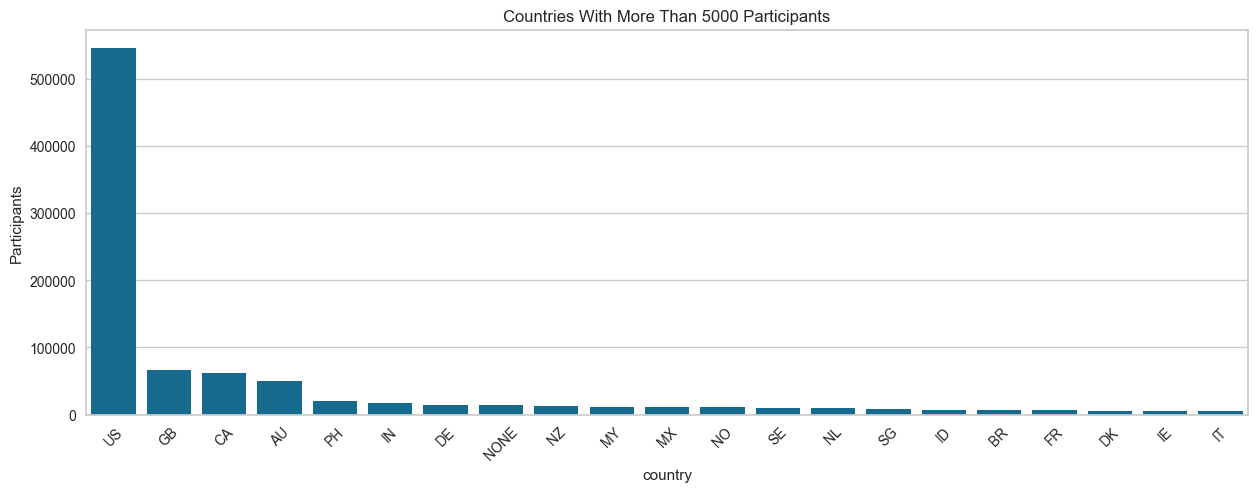

In [58]:
# Participants' nationality distriution
countries = data['country'].value_counts().reset_index()
countries.columns = ['country', 'count']
countries_5000 = countries[countries['count'] >= 5000]
plt.figure(figsize=(15,5))
sns.barplot(data=countries_5000, x='country', y='count')
plt.title('Countries With More Than 5000 Participants')
plt.ylabel('Participants')
plt.xticks(rotation=45)
plt.show()

In [59]:
# Groups and Questions
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Group Names and Columns
EXT = [column for column in data if column.startswith('EXT')]
EST = [column for column in data if column.startswith('EST')]
AGR = [column for column in data if column.startswith('AGR')]
CSN = [column for column in data if column.startswith('CSN')]
OPN = [column for column in data if column.startswith('OPN')]

In [60]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,60))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=14, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


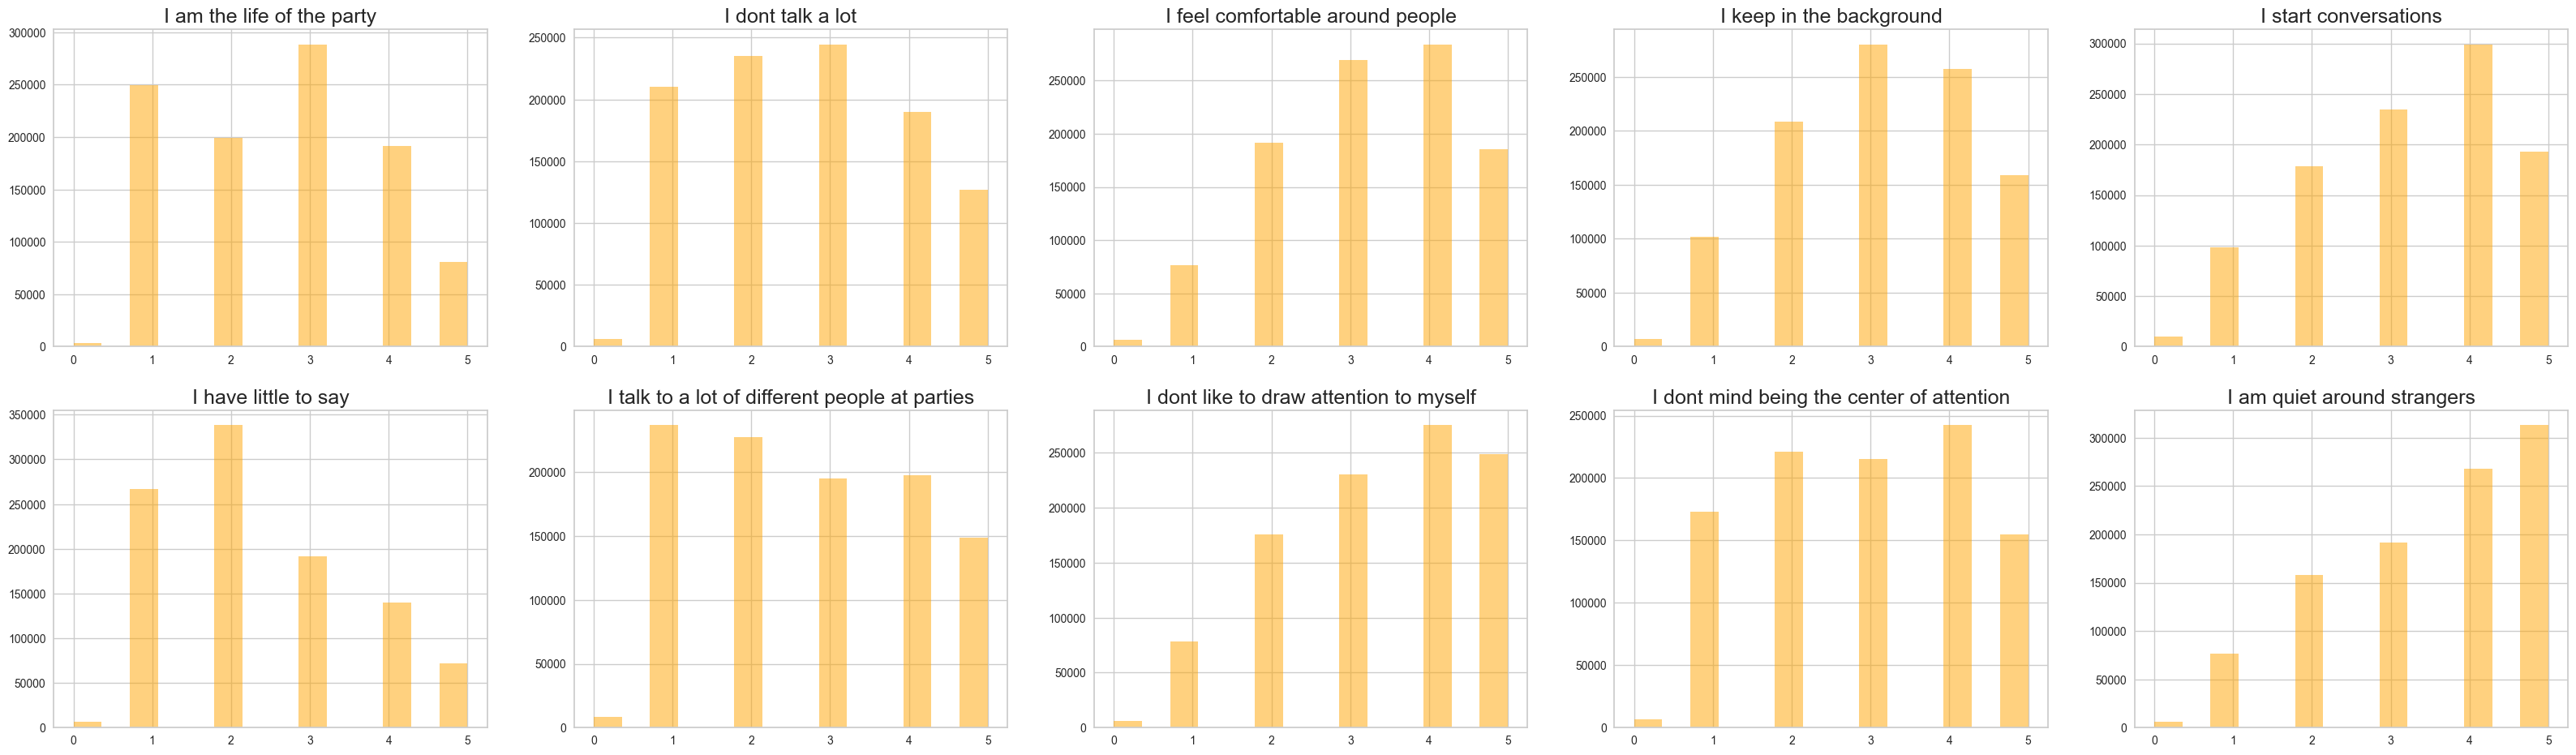

In [84]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


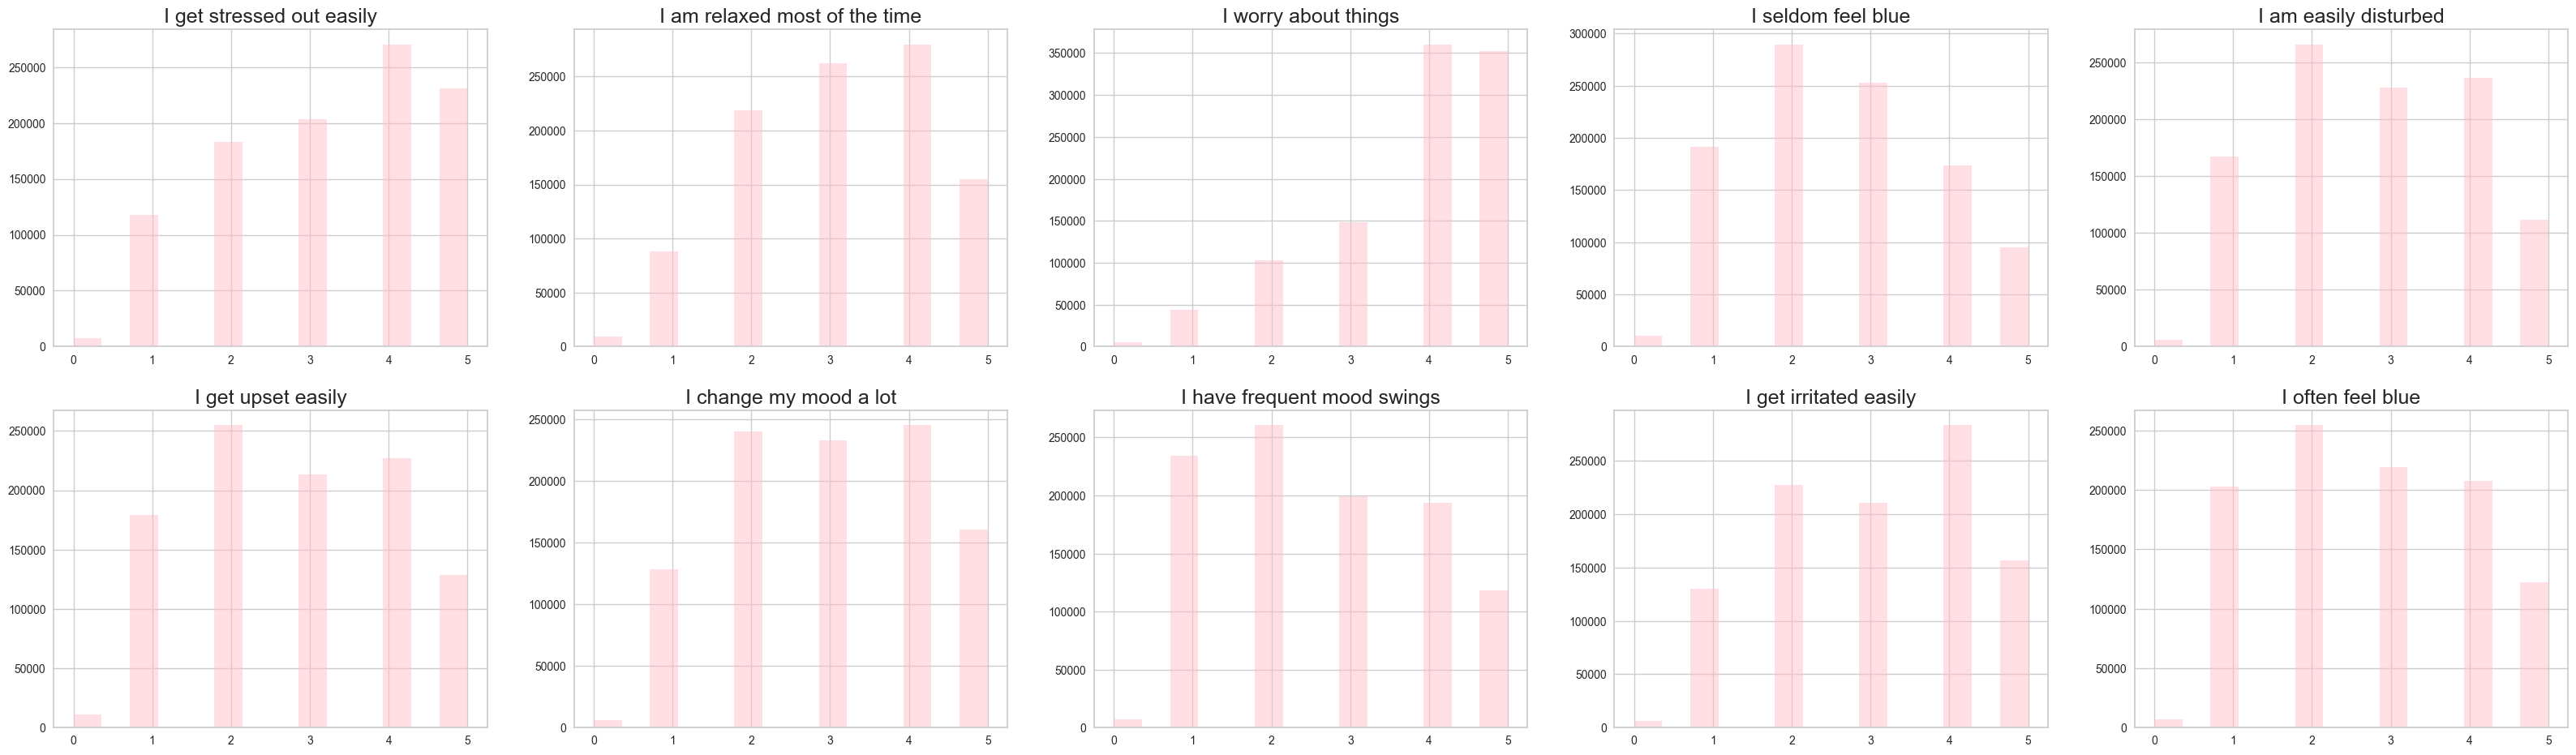

In [62]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


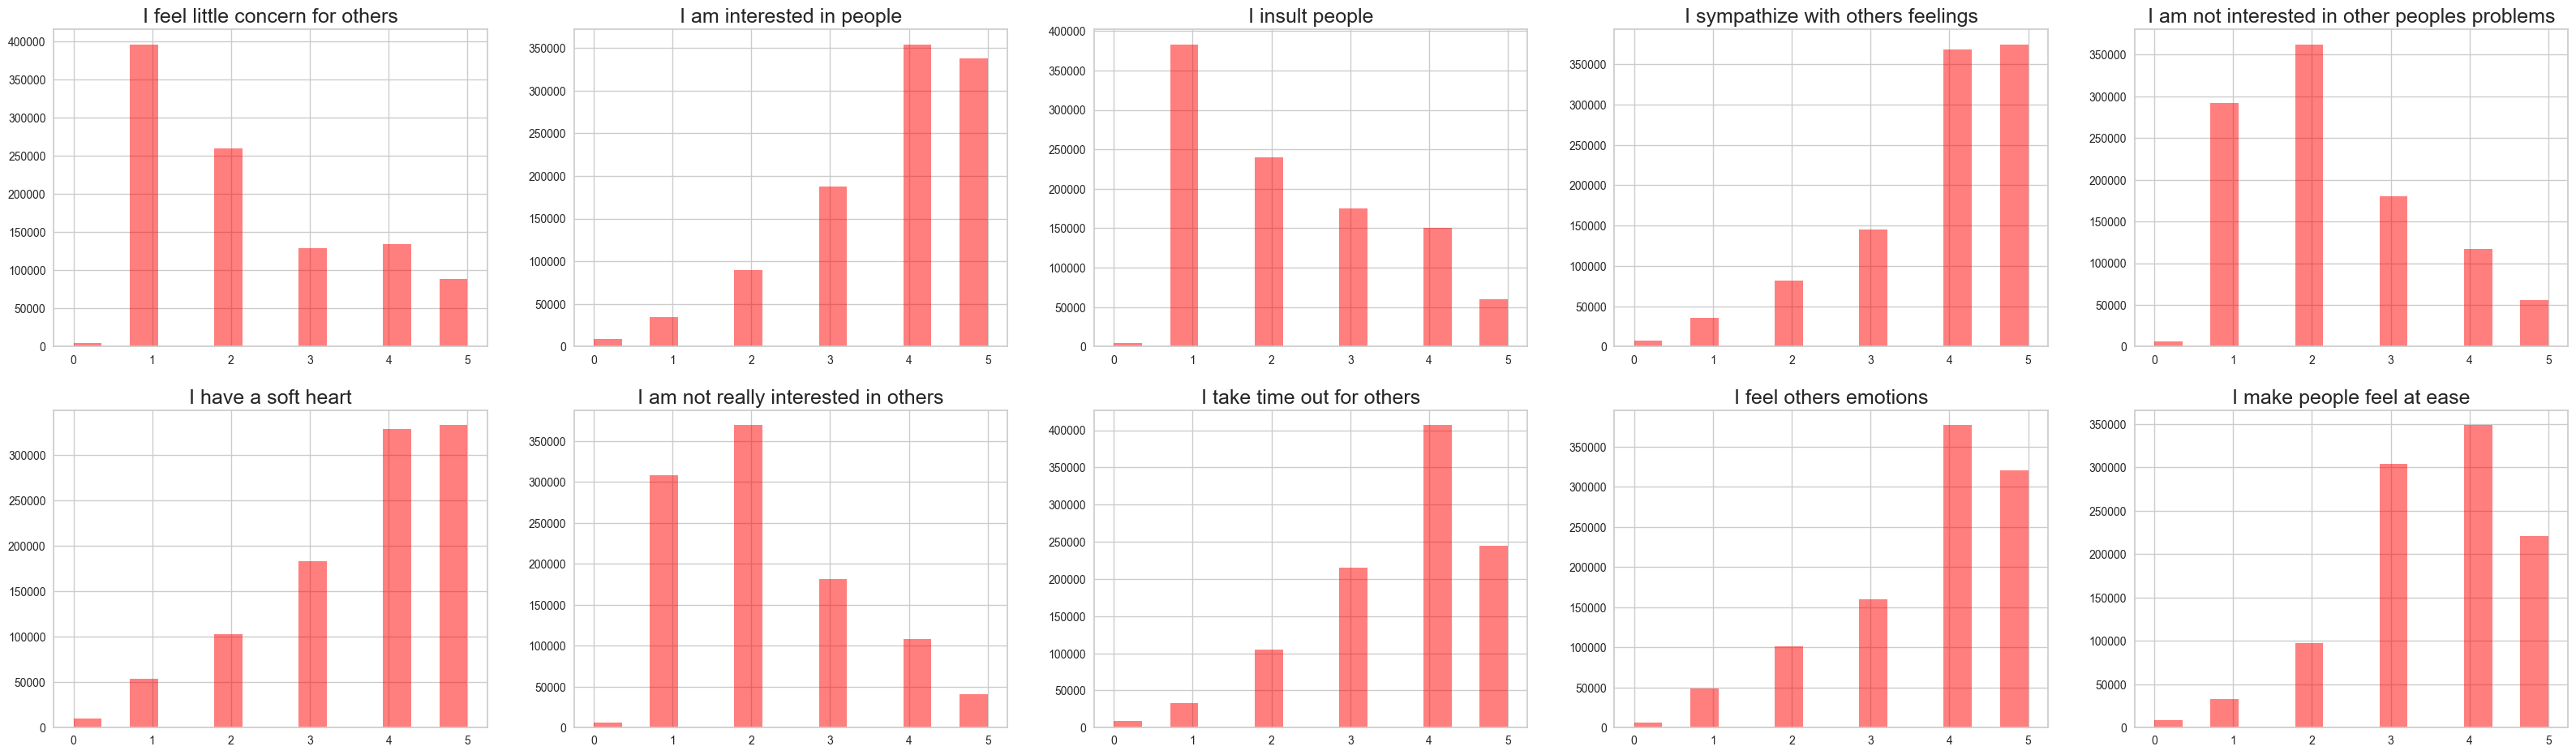

In [63]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


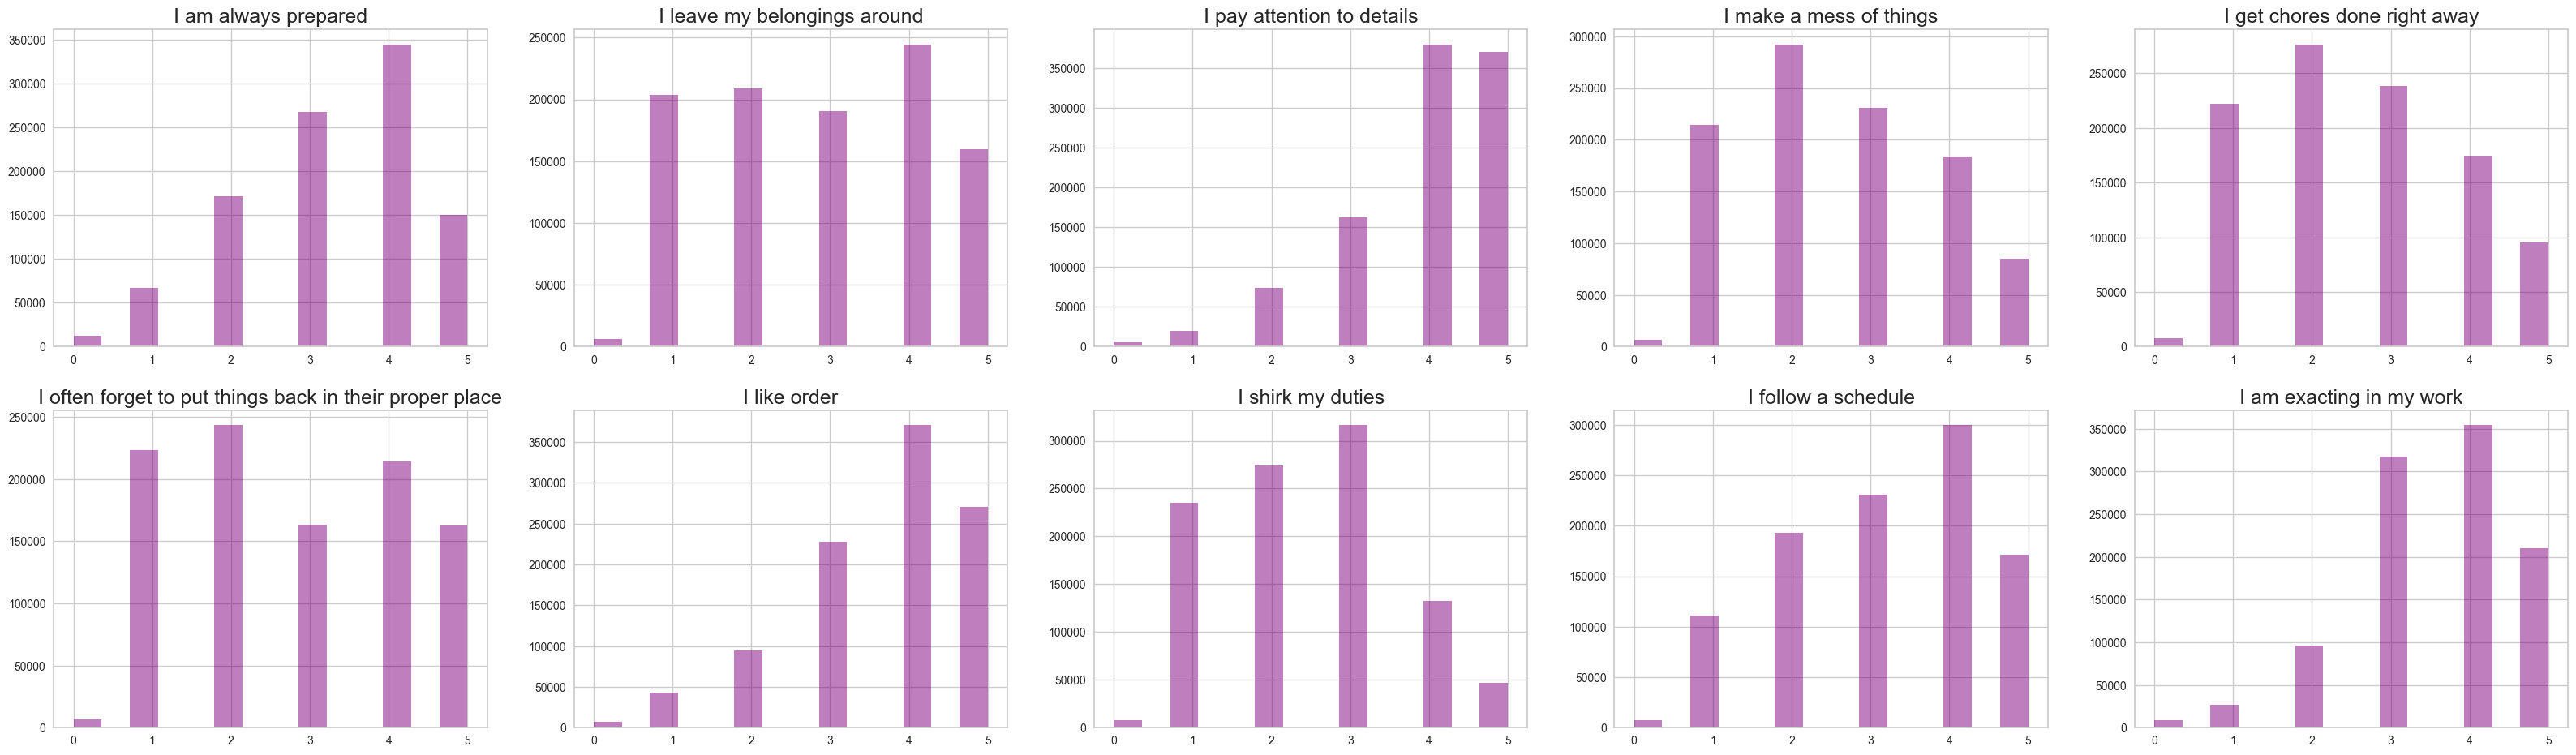

In [64]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


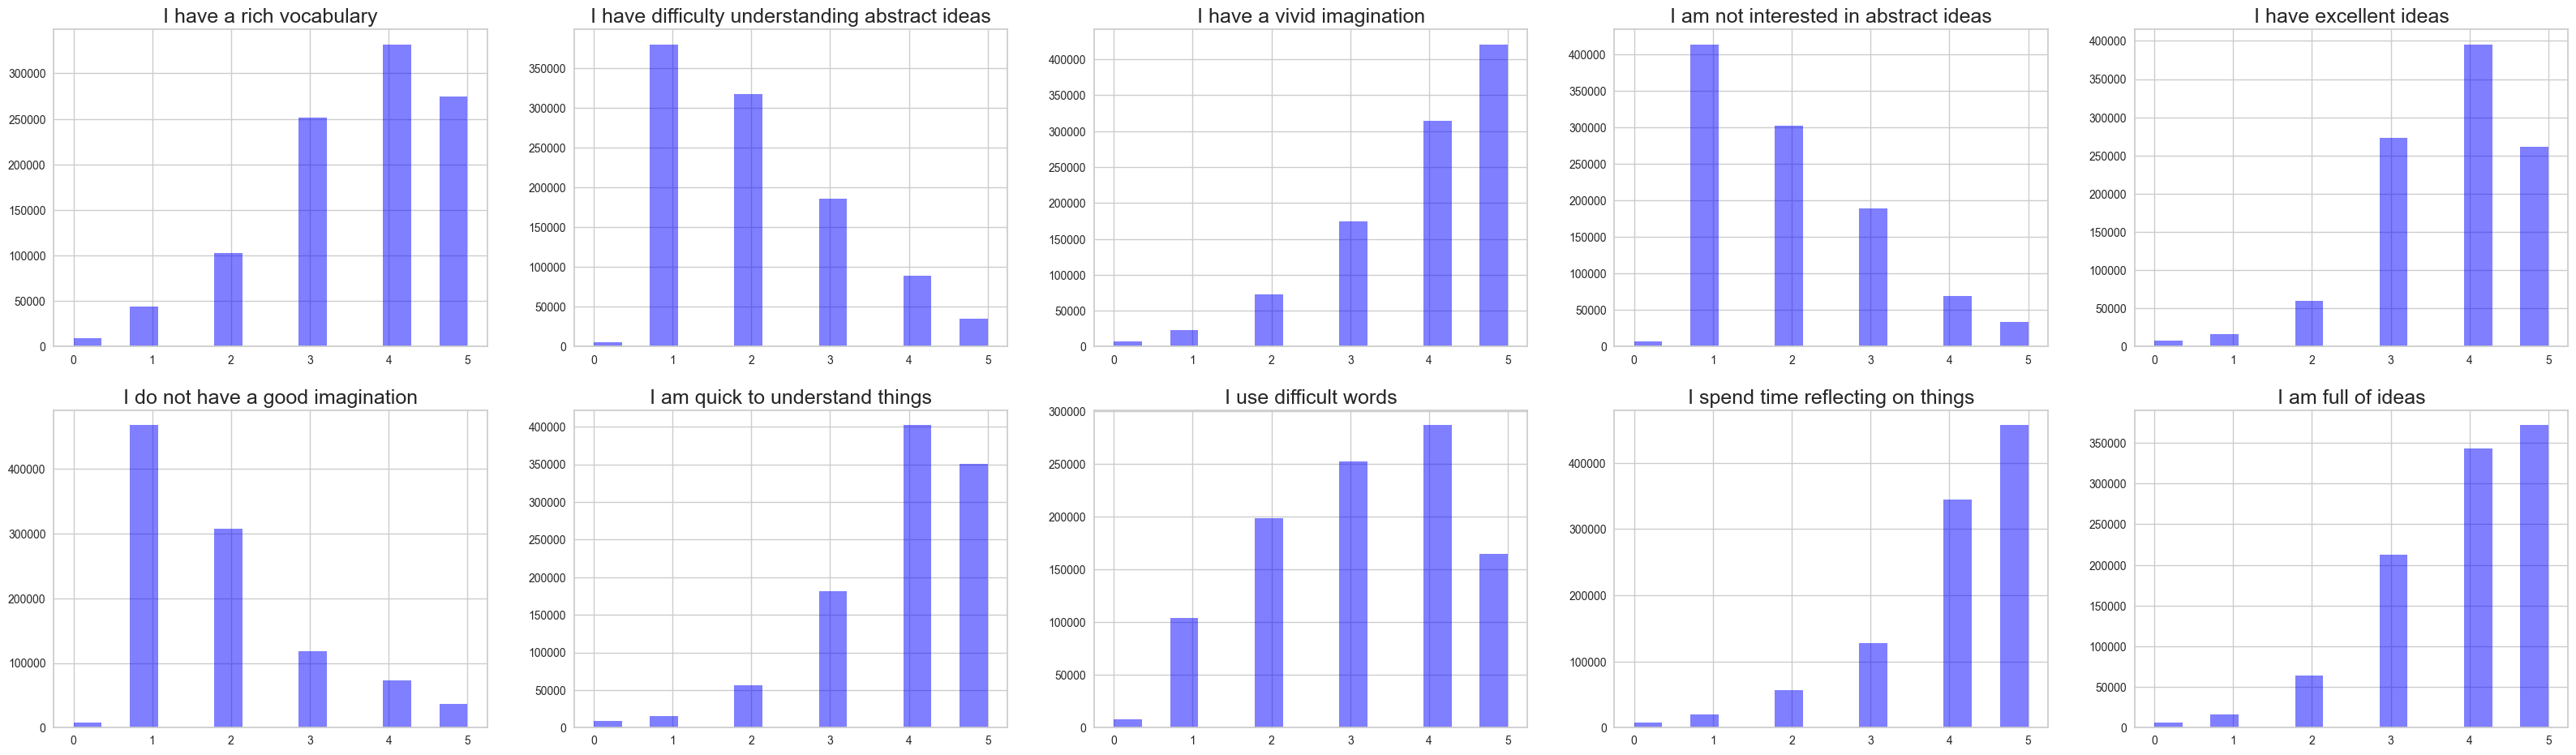

In [65]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

In [66]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop('country', axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

In [67]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [68]:
import sklearn
import yellowbrick

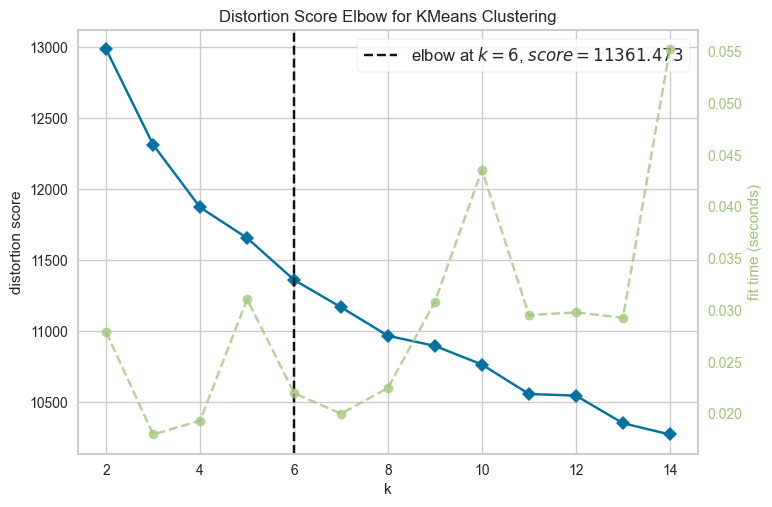

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
# Visualize the elbow
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(df_sample)
visualizer.poof()

In [70]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I use the unscaled data but without the country column
df_model = data.drop('country', axis=1)

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

In [71]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,...,OPN7,OPN8,OPN9,OPN10,Clusters
0,4.0,1.0,5.0,2.0,5.0,...,5.0,3.0,4.0,5.0,1
1,3.0,5.0,3.0,4.0,3.0,...,4.0,2.0,5.0,3.0,2
2,2.0,3.0,4.0,4.0,3.0,...,5.0,3.0,4.0,4.0,2
3,2.0,2.0,2.0,3.0,4.0,...,4.0,4.0,3.0,3.0,3
4,3.0,3.0,3.0,3.0,5.0,...,5.0,3.0,5.0,5.0,1


In [72]:
df_model.Clusters.value_counts()

Clusters
4    226031
2    211750
1    211323
0    198227
3    166150
Name: count, dtype: int64

In [73]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.813648,3.624552,2.230645,4.050715,2.283221,3.194333,1.746397,4.062020,2.184566,4.470955,4.244003,2.464215,4.498449,2.147962,3.556266,3.856190,3.989774,3.760537,4.006876,3.931694,2.511827,3.325102,2.619502,3.791648,2.596518,3.812013,2.751068,3.398432,3.632931,3.039102,2.789252,3.374359,3.803160,3.493318,2.076690,3.521417,3.546787,3.059281,2.758605,3.298093,3.499659,2.383399,4.062060,2.138871,3.431702,2.089746,3.674782,3.180349,4.271456,3.722036
1,3.458890,1.957794,4.332444,2.232620,4.254932,1.674716,3.872721,2.822977,3.728804,2.529744,2.323192,3.820886,3.157943,3.283055,2.112496,1.898118,2.106666,1.673481,2.113575,1.718455,1.891124,4.429537,1.822698,4.250290,1.855950,3.851313,1.588791,4.099317,4.103003,4.193997,3.724360,2.566644,4.197338,1.888294,3.149402,2.267037,3.877898,1.929250,3.590362,3.878627,3.881958,1.756349,4.079092,1.796809,4.155317,1.656535,4.313530,3.229871,4.097855,4.291019
2,2.120973,3.301426,3.076534,3.668113,2.953733,2.707013,2.199334,4.003362,2.320765,4.139934,3.548784,3.046366,4.182073,2.583830,2.851896,2.835381,2.913299,2.477752,3.015783,2.749591,1.884231,3.934347,1.700581,4.355603,1.985658,4.152123,2.018923,3.982399,4.180383,3.715702,3.835249,2.230361,4.300576,2.033299,3.237360,2.080052,4.171669,2.022904,3.837228,3.893856,3.577256,2.142725,3.902900,2.063934,3.727131,1.965138,4.007136,2.992104,4.273407,3.816831
3,2.184243,3.294589,2.799242,3.410184,2.586247,2.767686,2.116642,3.534090,2.641709,3.793169,2.336046,3.628878,2.989515,2.927367,2.315961,2.002474,2.288757,1.908890,2.565802,2.233500,3.011682,2.941992,2.556437,2.792922,3.135745,2.663720,2.989588,2.863382,2.619567,2.986988,3.151375,2.823804,3.672826,2.399260,2.377063,2.732820,3.383798,2.504225,2.779609,3.343852,3.533313,1.977502,3.613199,2.057725,3.622046,2.042919,3.886747,3.104454,3.701101,3.665838
4,3.456659,1.910353,3.797886,2.498825,4.044733,1.828426,3.659471,2.761418,3.770930,2.993735,3.797988,2.936836,4.233879,2.418217,3.279891,3.454477,3.797183,3.445266,3.646823,3.163429,2.162518,4.272317,2.659529,4.177856,2.004499,3.991598,1.858466,3.894054,4.125823,3.844420,2.950002,3.614818,3.836191,3.240569,2.227911,3.532122,3.450451,2.831337,2.937402,3.475059,3.739642,2.114891,4.247174,1.965394,3.957975,1.771027,3.962718,3.375594,4.185448,4.202556


In [74]:
# Summing up the different questions groups
col_list = list(df_model)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

data_sums = pd.DataFrame()
data_sums['extroversion'] = df_model[ext].sum(axis=1)/10
data_sums['neurotic'] = df_model[est].sum(axis=1)/10
data_sums['agreeable'] = df_model[agr].sum(axis=1)/10
data_sums['conscientious'] = df_model[csn].sum(axis=1)/10
data_sums['open'] = df_model[opn].sum(axis=1)/10
data_sums['clusters'] = predictions
data_sums.groupby('clusters').mean()

,extroversion,neurotic,agreeable,conscientious,open
clusters,,,,,
0,2.966105,3.645597,3.147814,3.172096,3.245406
1,3.086564,2.420787,3.208602,3.106921,3.325833
2,3.049119,3.020476,3.190995,3.164255,3.246856
3,2.912780,2.519719,2.856202,2.916863,3.120485
4,3.072244,3.417399,3.299108,3.209586,3.352242


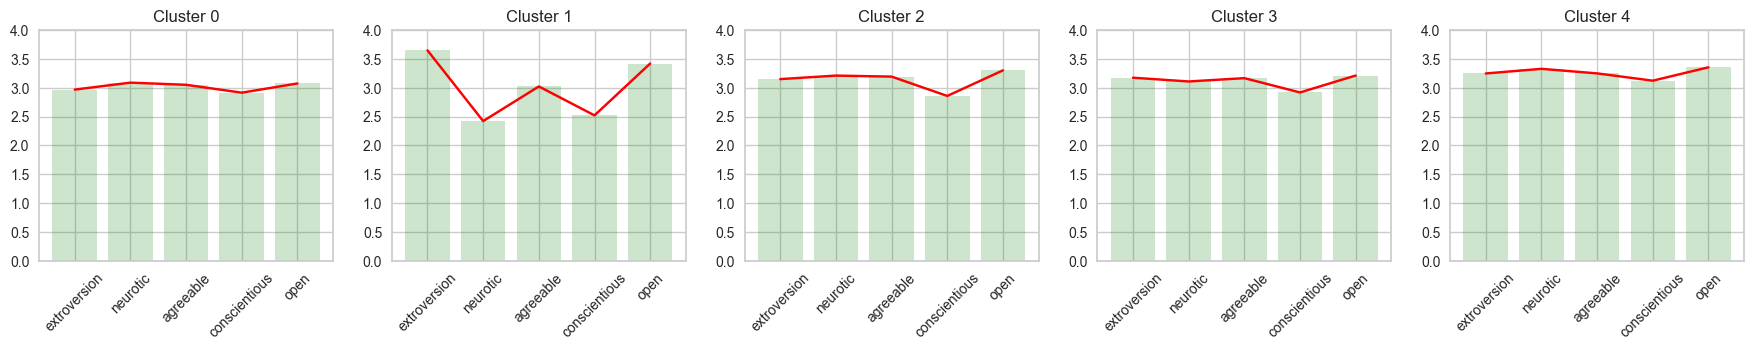

In [75]:
# Visualizing the means for each cluster
dataclusters = data_sums.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,4);

In [76]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(df_model)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca.head()

,PCA1,PCA2,Clusters
0,5.376500,1.294746,1
1,-0.370690,-3.169999,2
2,0.545560,-2.234438,2
3,-1.006531,-0.033676,3
4,4.449797,-2.916702,1


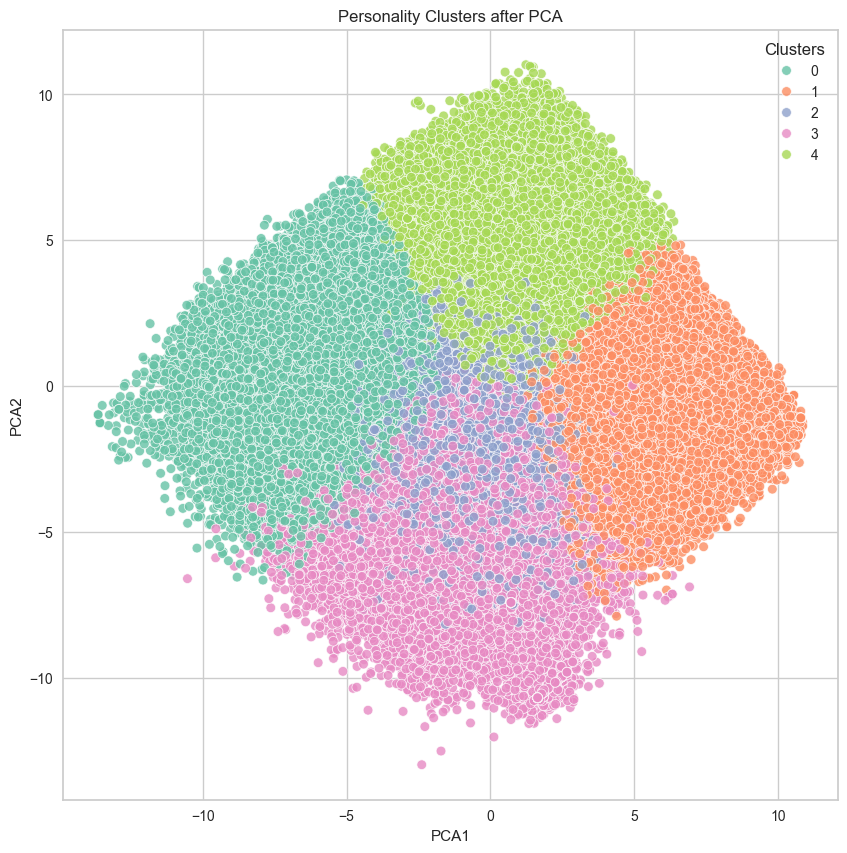

In [77]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [78]:
!pip install openpyxl

In [79]:
my_data = pd.read_excel(r"C:\Users\shash\Downloads\personality_test_responses.xlsx")
my_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,1,1,5,4,5,5,4,2,4,2,2,3,1,4,5,3,1,1,5,2,4,1,4,1,2,2,4,4,2,5,4,5,5,4,4,3,5,5,2,2,3,5,5,1,1,4,4,2,5,4
1,5,2,4,3,4,1,2,2,4,5,5,2,2,2,5,2,4,4,5,4,4,5,1,4,1,2,5,1,5,4,4,2,5,2,3,4,2,2,2,2,1,3,4,1,4,4,3,1,1,5
2,5,4,5,4,5,2,4,5,3,1,5,3,2,5,5,3,1,1,5,3,5,4,5,1,2,4,5,2,3,3,4,4,4,4,2,1,5,3,2,5,1,5,3,4,1,5,5,5,3,4
3,5,2,3,1,3,5,3,2,2,4,1,5,2,3,3,1,1,1,3,3,5,4,5,5,3,2,3,4,5,2,5,1,4,4,3,5,1,3,1,1,2,2,1,2,5,5,1,3,2,4
4,5,2,4,5,5,2,3,5,2,1,1,1,5,5,1,5,1,3,3,2,5,2,3,3,1,3,2,3,2,3,3,4,1,2,2,3,4,5,3,2,5,5,3,5,2,3,3,2,3,1
5,1,3,2,2,4,3,5,4,3,2,5,3,4,2,2,3,2,3,1,2,5,1,3,3,2,1,4,2,5,5,5,5,3,2,1,2,2,1,4,4,4,4,5,1,3,5,5,1,3,2
6,4,2,3,4,3,1,5,2,4,1,2,3,1,5,4,3,3,3,1,4,1,5,1,4,1,1,4,3,1,3,3,5,3,1,3,2,5,5,1,5,2,2,4,2,4,5,5,2,5,3
7,2,1,4,2,3,1,3,4,2,4,1,5,2,5,5,3,4,4,3,3,1,3,3,4,1,1,3,2,4,2,3,2,4,5,3,2,4,3,2,4,5,5,3,5,4,5,1,2,5,5
8,2,5,3,1,1,1,2,3,3,5,2,5,1,3,1,1,2,5,1,5,5,3,5,3,5,5,2,2,2,4,2,4,2,4,3,4,2,5,2,2,4,1,3,1,2,3,1,1,1,5
9,3,5,2,4,4,3,5,3,5,3,4,1,3,5,3,3,1,1,1,4,2,3,2,2,3,5,1,5,3,4,4,5,5,3,4,5,1,4,4,2,1,4,3,3,3,2,2,3,4,5


In [80]:
my_personality = k_fit.predict(my_data)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [3 4 3 3 3 3 1 3 3 4]


In [81]:
# Summing up the my question groups
col_list = list(my_data)
ext = col_list[0:10]
est = col_list[10:20]
agr = col_list[20:30]
csn = col_list[30:40]
opn = col_list[40:50]

my_sums = pd.DataFrame()
my_sums['extroversion'] = my_data[ext].sum(axis=1)/10
my_sums['neurotic'] = my_data[est].sum(axis=1)/10
my_sums['agreeable'] = my_data[agr].sum(axis=1)/10
my_sums['conscientious'] = my_data[csn].sum(axis=1)/10
my_sums['open'] = my_data[opn].sum(axis=1)/10
my_sums['cluster'] = my_personality
print('Sum of my question groups')
my_sums

Sum of my question groups


,extroversion,neurotic,agreeable,conscientious,open,cluster
0,3.3,2.7,2.9,3.9,3.4,3
1,3.2,3.5,3.2,2.8,2.7,4
2,3.8,3.3,3.4,3.4,3.6,3
3,3.0,2.3,3.8,2.8,2.7,3
4,3.4,2.7,2.7,2.9,3.2,3
5,2.9,2.7,3.1,2.9,3.3,3
6,2.9,2.9,2.4,3.3,3.4,1
7,2.6,3.5,2.4,3.2,4.0,3
8,2.6,2.6,3.6,3.0,2.2,3
9,3.7,2.6,3.0,3.7,3.0,4


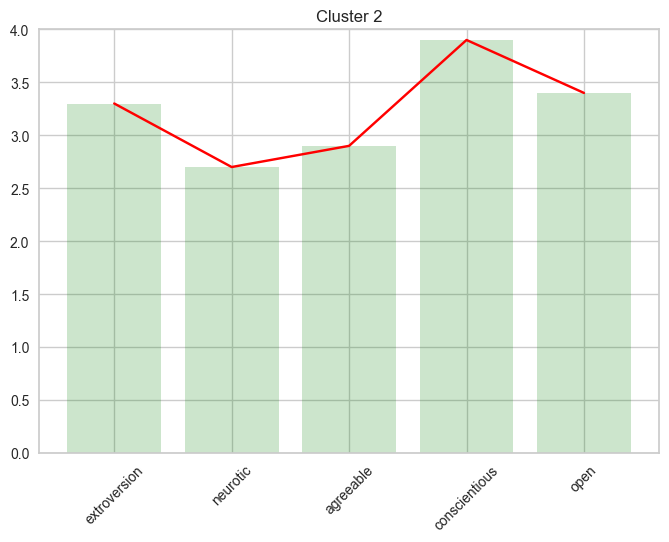

In [82]:
my_sum = my_sums.drop('cluster', axis=1)
plt.bar(my_sum.columns, my_sum.iloc[0,:], color='green', alpha=0.2)
plt.plot(my_sum.columns, my_sum.iloc[0,:], color='red')
plt.title('Cluster 2')
plt.xticks(rotation=45)
plt.ylim(0,4);